In [1]:
# math, numpy and torch
import numpy as np

# SciPy
from scipy.integrate import solve_ivp

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Constantes
tf = 60
dt = 0.001
N = round(tf/dt)
t = np.arange(0, tf, dt)

tspan = [0, tf]
c0 = [0, 0]

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-v0_8-whitegrid")
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 600

In [3]:
def system(t, z, k1, k2, k3, k4, Ac, xi):
    """
    This function returns the ODE system.

    Args:
        t (paramter): time (optional)
        z (list): state variables
        k1 (float): k1 constant
        k2 (float): k2 constant
        k3 (float): k3 constant
        k4 (float): k4 constant
        Ac (float): Ac constant
        xi (float): xi constant
    
    Returns:
        list: ODE system
    """
    x, y = z
    return [- k1*x - k2*y + Ac, k3*x - k4*y + xi*Ac]

def simulator(k1, k2, k3, k4, Ac, xi):
    """Solves the ODE system using the SciPy solver.

    Args:
        k1 (float): k1 constant
        k2 (float): k2 constant
        k3 (float): k3 constant
        k4 (float): k4 constant
        Ac (float): Ac constant
        xi (float): xi constant

    Returns:
        The solution of the ODE system.
    """
    return solve_ivp(system, tspan, c0, args = (k1, k2, k3, k4, Ac, xi), t_eval = t) # Paso explicito

## NFBL

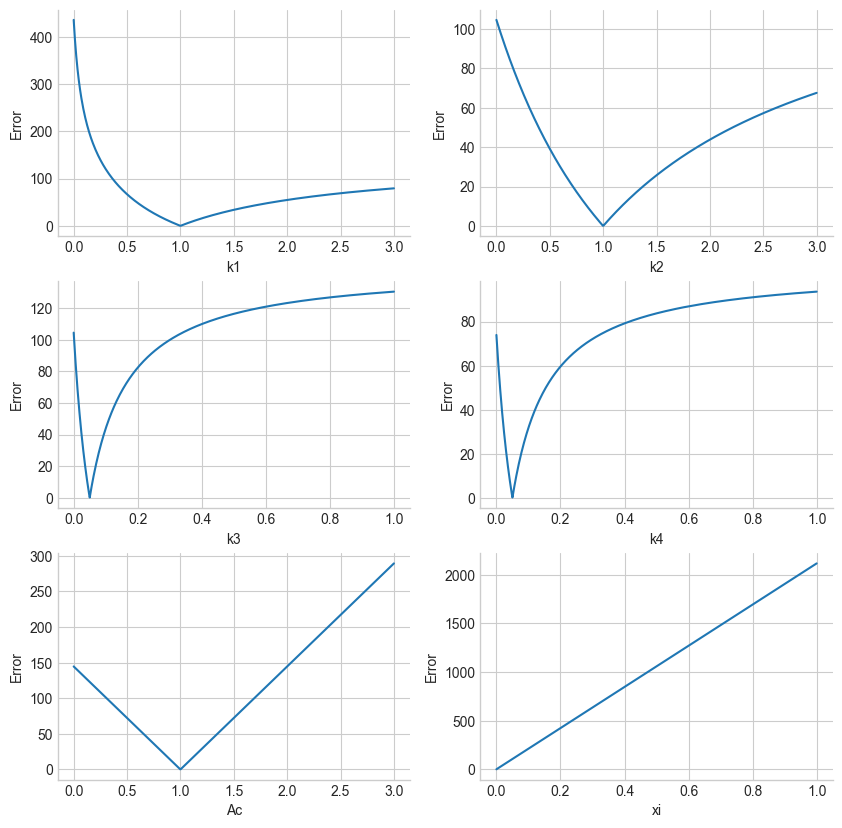

In [4]:
# NFBL
k1, k2, k3, k4, Ac, xi = 1, 1, 0.05, 0.05, 1, 0

nfbl_obs = simulator(k1, k2, k3, k4, Ac, xi)
x_obs = nfbl_obs.y[0]

k1_values = np.linspace(0, 3, 500)
k2_values = np.linspace(0, 3, 500)
k3_values = np.linspace(0, 1, 500)
k4_values = np.linspace(0, 1, 500)
Ac_values = np.linspace(0, 3, 500)
xi_values = np.linspace(0, 1, 500)

errors_k1 = []
errors_k2 = []
errors_k3 = []
errors_k4 = []
errors_Ac = []
errors_xi = []

for k1_val in k1_values:
    nfbl_sim = simulator(k1_val, k2, k3, k4, Ac, xi)
    x_sim = nfbl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_k1.append(error)

for k2_val in k2_values:
    nfbl_sim = simulator(k1, k2_val, k3, k4, Ac, xi)
    x_sim = nfbl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_k2.append(error)
    
for k3_val in k3_values:
    nfbl_sim = simulator(k1, k2, k3_val, k4, Ac, xi)
    x_sim = nfbl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_k3.append(error)
    
for k4_val in k4_values:
    nfbl_sim = simulator(k1, k2, k3, k4_val, Ac, xi)
    x_sim = nfbl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_k4.append(error)
    
for Ac_val in Ac_values:
    nfbl_sim = simulator(k1, k2, k3, k4, Ac_val, xi)
    x_sim = nfbl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_Ac.append(error)
    
for xi_val in xi_values:
    nfbl_sim = simulator(k1, k2, k3, k4, Ac, xi_val)
    x_sim = nfbl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_xi.append(error)
    
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

ax[0, 0].plot(k1_values, errors_k1)
ax[0, 0].set_xlabel("k1")
ax[0, 0].set_ylabel("Error")

ax[0, 1].plot(k2_values, errors_k2)
ax[0, 1].set_xlabel("k2")
ax[0, 1].set_ylabel("Error")

ax[1, 0].plot(k3_values, errors_k3)
ax[1, 0].set_xlabel("k3")
ax[1, 0].set_ylabel("Error")

ax[1, 1].plot(k4_values, errors_k4)
ax[1, 1].set_xlabel("k4")
ax[1, 1].set_ylabel("Error")

ax[2, 0].plot(Ac_values, errors_Ac)
ax[2, 0].set_xlabel("Ac")
ax[2, 0].set_ylabel("Error")

ax[2, 1].plot(xi_values, errors_xi)
ax[2, 1].set_xlabel("xi")
ax[2, 1].set_ylabel("Error")

plt.title("NFBL")
plt.show()

## IFFL

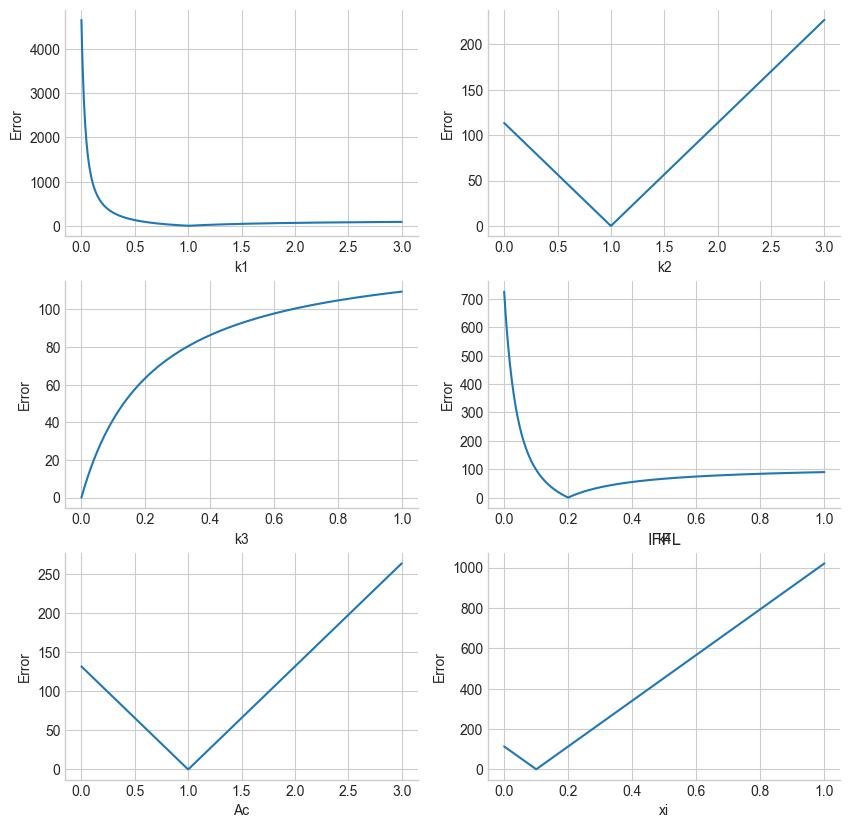

In [6]:
# IFFL
k1, k2, k3, k4, Ac, xi = 1, 1, 0, 0.2, 1, 0.1

iffl_obs = simulator(k1, k2, k3, k4, Ac, xi)
x_obs = iffl_obs.y[0]

k1_values = np.linspace(0, 3, 500)
k2_values = np.linspace(0, 3, 500)
k3_values = np.linspace(0, 1, 500)
k4_values = np.linspace(0, 1, 500)
Ac_values = np.linspace(0, 3, 500)
xi_values = np.linspace(0, 1, 500)

errors_k1 = []
errors_k2 = []
errors_k3 = []
errors_k4 = []
errors_Ac = []
errors_xi = []

for k1_val in k1_values:
    iffl_sim = simulator(k1_val, k2, k3, k4, Ac, xi)
    x_sim = iffl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_k1.append(error)

for k2_val in k2_values:
    iffl_sim = simulator(k1, k2_val, k3, k4, Ac, xi)
    x_sim = iffl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_k2.append(error)
    
for k3_val in k3_values:
    iffl_sim = simulator(k1, k2, k3_val, k4, Ac, xi)
    x_sim = iffl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_k3.append(error)
    
for k4_val in k4_values:
    iffl_sim = simulator(k1, k2, k3, k4_val, Ac, xi)
    x_sim = iffl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_k4.append(error)
    
for Ac_val in Ac_values:
    iffl_sim = simulator(k1, k2, k3, k4, Ac_val, xi)
    x_sim = iffl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_Ac.append(error)
    
for xi_val in xi_values:
    iffl_sim = simulator(k1, k2, k3, k4, Ac, xi_val)
    x_sim = iffl_sim.y[0]
    error = np.linalg.norm(x_obs - x_sim)
    errors_xi.append(error)
    
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

ax[0, 0].plot(k1_values, errors_k1)
ax[0, 0].set_xlabel("k1")
ax[0, 0].set_ylabel("Error")

ax[0, 1].plot(k2_values, errors_k2)
ax[0, 1].set_xlabel("k2")
ax[0, 1].set_ylabel("Error")

ax[1, 0].plot(k3_values, errors_k3)
ax[1, 0].set_xlabel("k3")
ax[1, 0].set_ylabel("Error")

ax[1, 1].plot(k4_values, errors_k4)
ax[1, 1].set_xlabel("k4")
ax[1, 1].set_ylabel("Error")

ax[2, 0].plot(Ac_values, errors_Ac)
ax[2, 0].set_xlabel("Ac")
ax[2, 0].set_ylabel("Error")

ax[2, 1].plot(xi_values, errors_xi)
ax[2, 1].set_xlabel("xi")
ax[2, 1].set_ylabel("Error")

plt.title("IFFL")
plt.show()